<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-01-01 16:32:29
-------------------
qualified stocks: 88
with latest results: 84
still star stocks: 42
-------------------
Initial Investment:  1.03 C
CY Investment:  1.16 C
Reserve:  3.10 K
Current:  1.20 C
-------------------
Today PnL: 1.36 L (1.15%)
Current PnL: -7.54 L (-6.49%)
CY Booked + Current PnL: 3.12 L (2.68%)
-------------------
Total profit:  5.85 L
Total loss:  -13.39 L
-------------------
Total Booked + Current PnL: 16.23 L (15.75%)
Total Booked PnL: 23.77 L (23.07%)
Curr Year Booked PnL: 10.66 L (8.92%)
Prev Year Booked PnL: 13.11 L (12.73%)
Est FTT:  1.91 C
Est FTT PnL: 71.20 L (59.58%)
-------------------
Est LTT:  2.47 C
Est LTT PnL: 1.28 C (106.78%)
Deployed:  1.03 C
Current:  1.20 C
CAGR/XIRR %: 13.07%


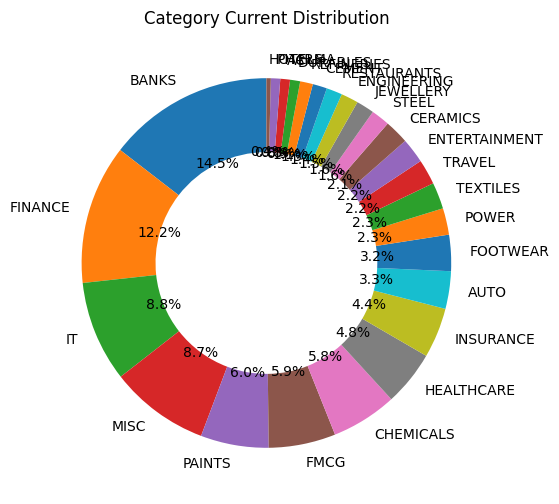

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,59.09,95282.0,17965.0,16503.0,0.28,23.24,17.32,44.58,19.0,1.09,0.80,11.49,XR,NTT,BANKS
79,TEAMLEASE,2557.47,3487.00,-6.39,M,92.05,126105.0,18691.0,20353.0,2.44,17.40,16.14,36.35,9.0,0.92,1.06,12.69,X40N,NTT,MISC
15,BAYERCROP,4346.57,6836.59,19.27,H,30.68,88448.0,18903.0,20936.0,-0.41,27.18,23.67,57.29,21.0,0.90,0.74,13.24,X40N,ATH,CHEMICALS
47,LALPATHLAB,2519.90,3690.00,-11.57,H,80.68,109910.0,19194.0,22927.0,1.75,21.16,20.86,46.43,19.0,0.84,0.92,52.71,X40N,NTT,HEALTHCARE
44,JUBLFOOD,487.35,850.00,3.62,M,96.59,165581.0,56415.0,24821.0,2.94,51.68,14.99,74.41,28.0,2.27,1.39,71.86,AR,NTT,RESTAURANTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SAIL,130.64,228.00,52.39,M,35.80,194465.0,-30497.0,198140.0,-0.18,-13.56,101.89,74.53,6.0,-0.15,1.63,5.42,XY24,BTT,STEEL
58,RBLBANK,230.61,388.00,-41.68,M,81.82,160325.0,-73975.0,233882.0,-0.13,-31.57,145.88,68.25,-50.0,-0.32,1.34,3.73,XY24,NTT,BANKS
11,BANDHANBNK,217.54,400.00,-43.14,M,26.14,175443.0,-63198.0,263357.0,0.55,-26.48,150.11,83.87,-25.0,-0.24,1.47,0.58,XY24,NTT,BANKS
75,TANLA,991.56,2007.31,-33.60,M,93.18,165805.0,-53330.0,277806.0,11.62,-24.34,167.55,102.44,-32.0,-0.19,1.39,12.87,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,59.09,95282.0,17965.0,16503.0,0.28,23.24,17.32,44.58,19.0,1.09,0.80,11.49,XR,NTT,BANKS
15,BAYERCROP,4346.57,6836.59,19.27,H,30.68,88448.0,18903.0,20936.0,-0.41,27.18,23.67,57.29,21.0,0.90,0.74,13.24,X40N,ATH,CHEMICALS
47,LALPATHLAB,2519.90,3690.00,-11.57,H,80.68,109910.0,19194.0,22927.0,1.75,21.16,20.86,46.43,19.0,0.84,0.92,52.71,X40N,NTT,HEALTHCARE
70,SIS,477.00,528.00,72.43,M,57.95,62186.0,-18904.0,27573.0,1.36,-23.31,44.34,10.69,-21.0,-0.69,0.52,1.36,X40N,NTT,MISC
19,CERA,9059.90,10420.45,-1.17,H,87.50,76480.0,-14119.0,27724.0,0.80,-15.58,36.25,15.02,-51.0,-0.51,0.64,16.11,X40N,ATH,CERAMICS
76,TATAELXSI,7332.28,9000.00,-13.63,H,76.14,94412.0,-8240.0,31590.0,-0.78,-8.03,33.46,22.74,-5.0,-0.26,0.79,5.79,X40N,NTT,IT
81,TRIDENT,37.35,48.00,72.61,M,71.59,83634.0,-8620.0,34926.0,1.26,-9.34,41.76,28.51,-11.0,-0.25,0.70,8.32,XR,NTT,TEXTILES
48,LAOPALA,369.40,464.00,-13.63,M,39.77,88848.0,-11998.0,37823.0,2.25,-11.90,42.57,25.61,-41.0,-0.32,0.74,10.72,AR,NTT,CERAMICS
51,MASFIN,326.60,401.09,-26.43,M,62.50,81450.0,-16530.0,38876.0,-1.38,-16.87,47.73,22.81,-74.0,-0.43,0.68,3.43,XR,ATH,FINANCE
83,UJJIVANSFB,59.50,60.00,-37.36,M,69.32,58310.0,-42840.0,43692.0,1.45,-42.35,74.93,0.84,-25.0,-0.98,0.49,6.39,X40N,NTT,BANKS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
42,JIOFIN,320.24,387.0,-8.68,M,15.91,150398.0,-7801.0,40773.0,1.92,-4.93,27.11,20.85,65.0,-0.19,1.26,29.83,XY24,BTT,FINANCE
18,CAMPUS,294.86,393.0,4.22,M,95.45,182364.0,14589.0,41251.0,-0.70,8.70,22.62,33.28,18.0,0.35,1.53,49.42,XY24,NTT,FOOTWEAR
84,UNIONBANK,123.87,163.0,-8.68,M,85.23,139919.0,-921.0,45418.0,2.23,-0.65,32.46,31.59,-20.0,-0.02,1.17,13.69,XY24,NTT,BANKS
28,GICRE,335.06,583.0,16.72,M,97.73,200386.0,53965.0,54385.0,3.22,36.86,27.14,74.00,137.0,0.99,1.68,54.89,XY24,BTT,INSURANCE
54,NHPC,82.08,115.0,192.99,M,77.27,140773.0,-240.0,56802.0,1.55,-0.17,40.35,40.11,-85.0,-0.00,1.18,24.17,XY24,NTT,POWER
23,DABUR,518.36,735.0,-9.19,H,55.68,130292.0,-1890.0,57133.0,0.78,-1.43,43.85,41.79,-3.0,-0.03,1.09,4.16,XY24,BTT,FMCG
52,MEDANTA,1022.60,1486.0,-1.29,M,72.73,167306.0,11871.0,58557.0,2.06,7.64,35.00,45.32,30.0,0.20,1.40,16.53,XY24,NTT,HEALTHCARE
43,JPPOWER,18.73,26.2,-62.10,L,53.41,136768.0,-5074.0,61641.0,2.03,-3.58,45.07,39.88,85.0,-0.08,1.14,20.80,XY24,NTT,POWER
7,ATULAUTO,624.44,844.0,-13.46,M,44.32,135204.0,-12164.0,63979.0,-1.02,-8.25,47.32,35.16,-37.0,-0.19,1.13,20.43,XY24,NTT,AUTO
77,TATAMOTORS,798.82,1065.0,-57.46,M,35.80,153596.0,-10162.0,64725.0,1.23,-6.21,42.14,33.32,-70.0,-0.16,1.29,3.75,XY24,NTT,AUTO


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,59.09,95282.0,17965.0,16503.0,0.28,23.24,17.32,44.58,19.0,1.09,0.80,11.49,XR,NTT,BANKS
44,JUBLFOOD,487.35,850.00,3.62,M,96.59,165581.0,56415.0,24821.0,2.94,51.68,14.99,74.41,28.0,2.27,1.39,71.86,AR,NTT,RESTAURANTS
81,TRIDENT,37.35,48.00,72.61,M,71.59,83634.0,-8620.0,34926.0,1.26,-9.34,41.76,28.51,-11.0,-0.25,0.70,8.32,XR,NTT,TEXTILES
48,LAOPALA,369.40,464.00,-13.63,M,39.77,88848.0,-11998.0,37823.0,2.25,-11.90,42.57,25.61,-41.0,-0.32,0.74,10.72,AR,NTT,CERAMICS
51,MASFIN,326.60,401.09,-26.43,M,62.50,81450.0,-16530.0,38876.0,-1.38,-16.87,47.73,22.81,-74.0,-0.43,0.68,3.43,XR,ATH,FINANCE
36,IEX,133.39,219.00,-2.34,M,79.55,201666.0,52403.0,43399.0,-0.86,35.11,21.52,64.18,28.0,1.21,1.69,36.73,XR,NTT,MISC
38,INDUSINDBK,1354.50,1800.00,-35.28,M,56.82,55256.0,-21950.0,47343.0,0.96,-28.43,85.68,32.89,-21.0,-0.46,0.46,4.30,XR,NTT,BANKS
20,CLEAN,1389.74,2137.00,-0.02,H,100.00,126530.0,12571.0,48701.0,8.43,11.03,38.49,53.77,2.0,0.26,1.06,20.95,XR,NTT,CHEMICALS
17,BSOFT,628.85,844.81,-2.37,M,34.09,98534.0,-11515.0,49306.0,0.48,-10.46,50.04,34.34,-22.0,-0.23,0.82,3.24,XR,ATH,IT
24,DEN,52.79,75.00,-20.00,L,52.27,70224.0,-14240.0,49775.0,0.57,-16.86,70.88,42.07,-18.0,-0.29,0.59,8.85,AR,NTT,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.61
1,20,34.26
2,30,47.77


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.05
X40,19.81
X40N,14.98
XR,14.61
AR,6.72
SR,1.42
X200,1.42


In [10]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.52,-9.96,62.02
FINANCE,12.20,-12.10,59.30
IT,8.81,-5.61,58.69
MISC,8.71,2.44,33.65
PAINTS,5.96,-15.70,49.94
FMCG,5.85,-4.78,45.62
CHEMICALS,5.75,-5.34,71.87
HEALTHCARE,4.81,9.41,37.89
INSURANCE,4.39,7.58,42.29


In [11]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2753972.0
XR,1806943.0
X40N,895076.0
X40,841256.0
AR,600641.0
SR,174837.0
X200,47673.0


In [12]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M,4563915.0
H,1636161.0
L,920322.0


In [13]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Conviction', 'Criteria'])['FTT Amt'].sum().sort_values(ascending=False)

Conviction  Criteria
M           XY24        2403004.0
            XR           861209.0
L           XR           808906.0
H           X40          783234.0
M           X40N         573370.0
            AR           493473.0
H           X40N         321706.0
            XY24         289327.0
M           SR           174837.0
H           XR           136828.0
L           XY24          61641.0
M           X40           58022.0
H           AR            57393.0
L           AR            49775.0
H           X200          47673.0
Name: FTT Amt, dtype: float64

In [14]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M,55
H,28
L,5
